# Plot

## Librairies

In [10]:
import os

import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Plots

In [4]:
# Choose your run file
file = os.path.join(os.getcwd(), "new_simul_19.csv")
df = pd.read_csv(file, header="infer")

In [5]:
df

,memory_length,nb_attractors,min_attractors,max_attractors,eta,tick
0,1,27,27,27,0.15,0
1,1,27,27,27,0.15,0
2,1,16,16,16,0.15,0
3,1,16,16,16,0.15,0
4,1,16,16,16,0.15,0
...,...,...,...,...,...,...
2994,613,1,1,1,0.15,0
2995,612,1,1,1,0.15,0
2996,611,1,1,1,0.15,0
2997,610,1,1,1,0.15,0


In [ ]:
steps = df.index.values                     # List of simulation steps (x-axis)
t0s = df["tick"].values.nonzero()[0]      # List of ticks (memory data points)
memory = df["memory_length"].values         # List of memory size values
nb_attractors = df["nb_attractors"].values  # List of number of attractors
learning_rates = df["eta"].values           # List of learning rates

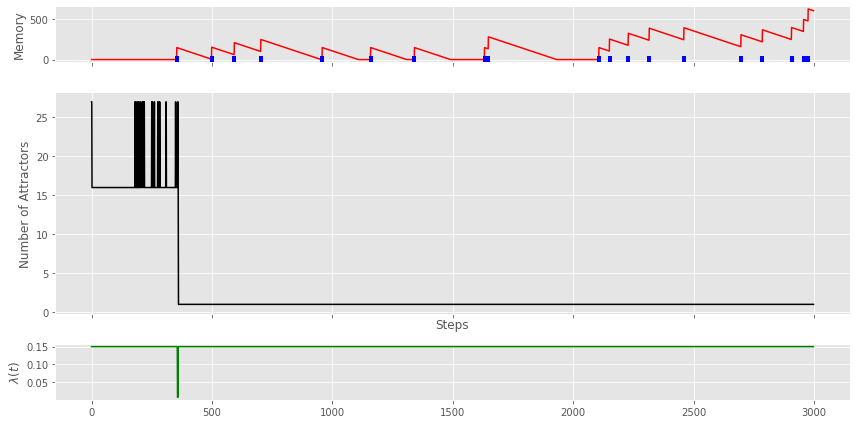

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and set of subplots with custom heights for each row
fig, (ax2, ax1, ax3) = plt.subplots(3, 1, figsize=(12, 6), sharex=True, gridspec_kw={'height_ratios': [0.5, 2, 0.5]})

# Plot the memory on the first subplot (ax2), which is the shorter plot
ax2.plot(steps, memory, color='red', alpha=1)
# Add vertical lines at each tick in ax1
for tick in t0s:
    ax2.axvline(x=tick, ymin=0, ymax=0.075, linewidth=4, color='blue')
ax2.set_ylabel('Memory', size=12)
ax2.tick_params(axis='y')
ax2.grid(True)

# Plot the number of attractors on the second subplot (ax1), which is the taller plot
ax1.plot(steps, nb_attractors, color='black', label='Number of Attractors')
ax1.set_xlabel('Steps', size=12)
ax1.set_ylabel('Number of Attractors', size=12)
ax1.tick_params(axis='y')
ax1.grid(True)

# Plot the learning rates
ax3.plot(steps, learning_rates, color='green', alpha=1)
ax3.set_ylabel('$\lambda(t)$', size=12)
ax3.tick_params(axis='y')
ax3.grid(True)

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.savefig("plots/STDP_19.pdf")
plt.show()


In [18]:
os.getcwd()

'/Users/jeremie.cabessau-paris2.fr/Desktop/MAIN/Code/Python/My_programs/AttractorDynamics/runs'

In [11]:
with open("sim_stdp-gp_1001_50_10.pkl", "rb") as fh:
    sol = pickle.load(fh)

In [ ]:
t0s = sl[1]
sol = np.array(sol[0])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

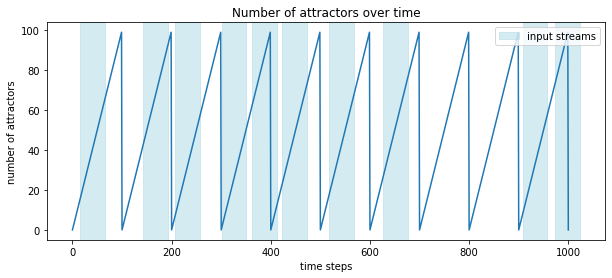

In [6]:
import matplotlib.pyplot as plt

# Chunks start and end points
t0s = [15, 143, 207, 301, 362, 423, 518, 627, 908, 973]
t1s = [start + 50 for start in t0s]

# Create a plot
fig, ax = plt.subplots(figsize=(10, 4))

# Example data
x = range(0, 1001)
y = [i % 100 for i in x]  # Dummy data for demonstration
ax.plot(x, y)

# Add colored regions for each chunk
for start, end in zip(t0s, t1s):
    ax.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Customize the plot
ax.set_xlabel("time steps")
ax.set_ylabel("number of attractors")
ax.set_title("Number of attractors over time")
ax.legend(loc="upper right")
plt.show()